In [5]:
import sys
sys.path.append("..")

In [6]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
import tensorflow as tf

In [7]:
print(yolo_config['img_size'][0])
print(yolo_config['img_size'][1])

416
416


In [8]:
train_lines, val_lines = read_annotation_lines('../dataset/train_annotations/butelka.txt', test_size=0.1)
FOLDER_PATH = '../dataset/train_images_yolo/'
class_name_path = '../class_names/butelka_classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)


model = Yolov4(weight_path='../yolov4.weights', 
               class_name_path=class_name_path,
               config=yolo_config)


Yolov4
(416, 416, 3)
Build model


2021-12-24 10:03:24.619795: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 10:03:24.636096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 10:03:24.637653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 10:03:24.640059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-24 10:03:24.640922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

nms iou: 0.413 score: 0.3
failed to read  all weights, # of unread weights: 0
load from ../yolov4.weights


In [9]:
model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10, 
          val_data_gen=data_gen_val)

Epoch 1/10


2021-12-24 10:03:40.936110: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-24 10:03:59.191707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


900/900 [==============================] - 642s 689ms/step - loss: 717.4935 - val_loss: 10.8677
Epoch 2/10
900/900 [==============================] - 617s 686ms/step - loss: 9.9058 - val_loss: 9.9075
Epoch 3/10
900/900 [==============================] - 617s 685ms/step - loss: 9.8292 - val_loss: 10.5508
Epoch 4/10
900/900 [==============================] - 617s 685ms/step - loss: 7.3383 - val_loss: 6.1034
Epoch 5/10
900/900 [==============================] - 617s 685ms/step - loss: 5.9059 - val_loss: 7.9652
Epoch 6/10
900/900 [==============================] - 616s 685ms/step - loss: 6.8852 - val_loss: 8.1039
Epoch 7/10
900/900 [==============================] - 617s 685ms/step - loss: 5.9056 - val_loss: 8.5033
Epoch 8/10
900/900 [==============================] - 617s 686ms/step - loss: 4.6919 - val_loss: 7.2290
Epoch 9/10
900/900 [==============================] - 617s 685ms/step - loss: 5.1678 - val_loss: 87.3243
Epoch 10/10
900/900 [==============================] - 617s 685ms/step

In [13]:
model.save_model('wagi')

2021-12-24 12:04:23.044703: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: wagi/assets


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
model.load_model('wagi')

In [ ]:
min_loss = 10000

class SaveCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if(min_loss > current):
            min_loss = current
            model.save_model(f'siec_{epoch}')

In [ ]:
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='nasze.{epoch:02d}-{val_loss:.2f}.h5'),
]


model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10000, 
          val_data_gen=data_gen_val,
          callbacks=[my_callbacks])

In [ ]:
model.predict('../dataset/train_orig_images//IMG_0650.JPG', random_color=True)

In [ ]:
model.predict('../dataset/valid_images/IMG_0650.JPG', random_color=True)

In [ ]:
model.save_model('moje_wagi_3')

In [10]:
from glob import glob
import os

In [11]:
def check_directory_localization(directory):
    for img_path in glob(os.path.join(directory, '*')):
        model.predict(img_path, random_color=True)

img shape:  (3840, 2160, 3)
# of bboxes: 1


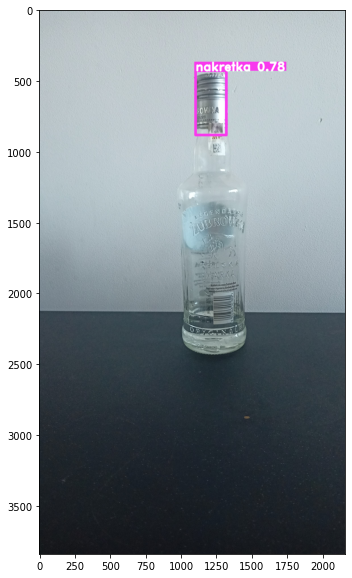

img shape:  (3840, 2160, 3)
# of bboxes: 1


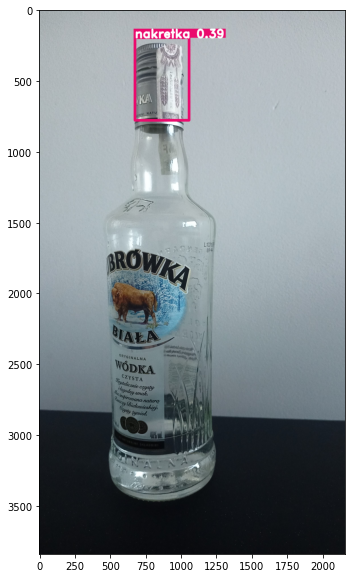

img shape:  (3840, 2160, 3)
# of bboxes: 1


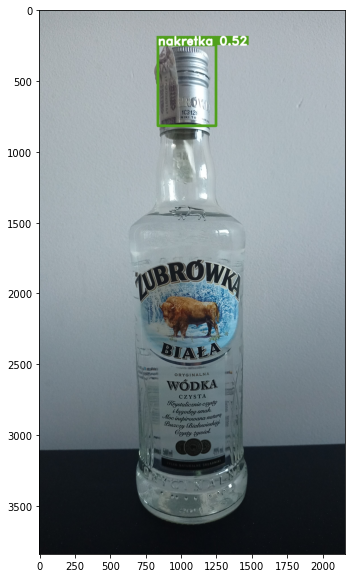

img shape:  (3840, 2160, 3)
# of bboxes: 1


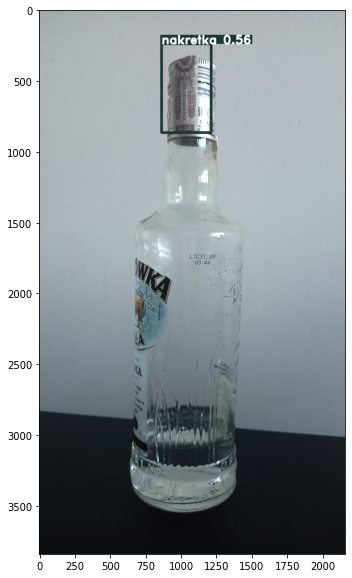

img shape:  (4032, 3024, 3)
# of bboxes: 1


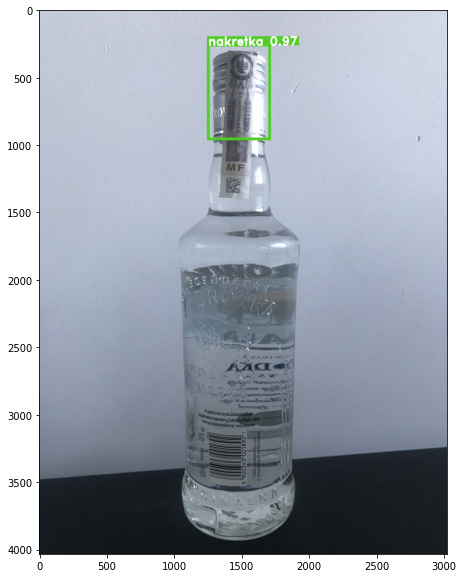

img shape:  (3840, 2160, 3)
# of bboxes: 1


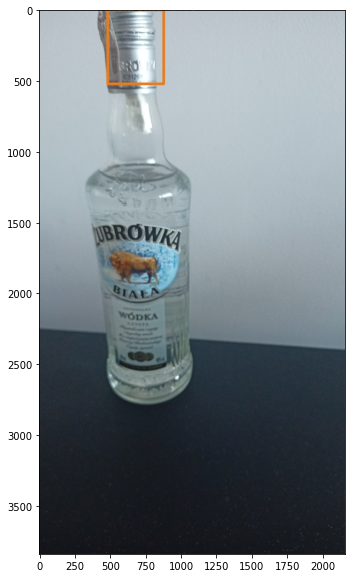

img shape:  (3840, 2160, 3)
# of bboxes: 1


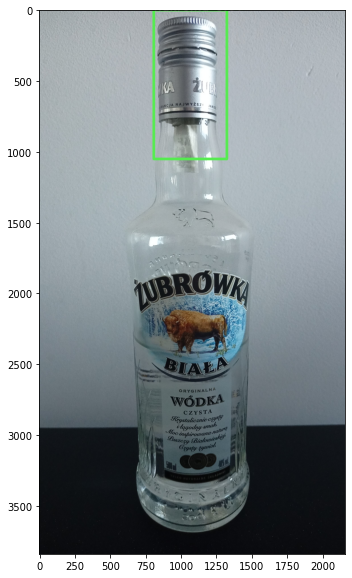

img shape:  (4032, 3024, 3)
# of bboxes: 1


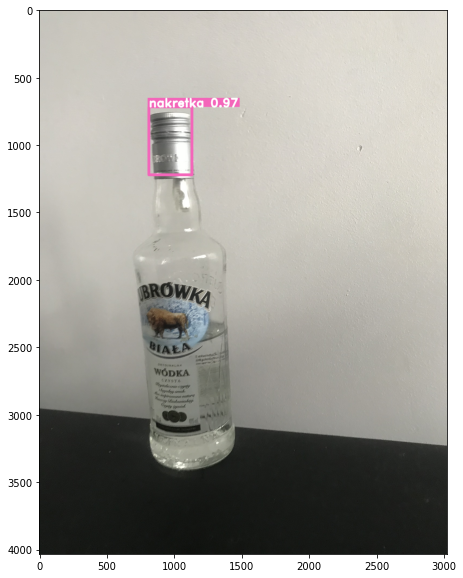

In [12]:
check_directory_localization('../dataset/valid_images')